# Simulated Real World Phenomenon

Ian Wafer
<br>Student No. G00376322

## Purpose

The purpose of this programming project is to synthesise a dataset that simulates a rea world phenomenon of our choosing. It is recommended we pick something of interest to our personal or professional life and that we use the numpy.random package to do so. The selected phenomenon needs to be measureable and for which we could collect at least 100 data points across 4 seperate variables for. We need to investigate the variables involved, their distribution in relation to each other. Synthesise or simulate a data set that closely mathces thir properties and detail all research in a Jupyter notebook.


## Introduction

I have decided to investigate and generate a dataset for weight lifted in powerlifting. This is of interest to me as I have previously competed in powerlifting and have noticed certain trends that drive the sport forward. To ensure we generate data with some accuracy we'll need to investigate existing data on the sport and determine the relationship between the variables in it's generation.

In my investigation I will look at the following categories-
- Sex
- Age
- Weight
- Years competing
- Total Squat Amount Lifted
- Total Bench Amount Lifted
- Total Deadlift Amount Lifted


In [146]:
#import relevant modules

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sourced from https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
# sets the backend of matplotlib to the 'inline' backend

%matplotlib inline 


# Set default grid style for plots

sns.set(style='darkgrid')

### Sex

First we'll look at the sex of the dataset required. From the source listed we can see that males make up about 63% of the pool while females cover the remaining 37%. Here we can use the numpy.random.choice function to generate the quantity of males and females in the random data generation. NumPy.random.choice will generate a 1 dimnensional array of the required data in the proprtions entered in the probability chance of the event occuring.

['Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female'
 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male']


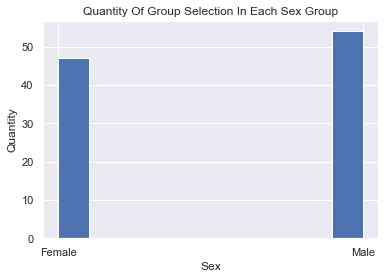

,Sex
96,Female
97,Female
98,Female
99,Male
100,Male


In [147]:
# Source of info https://www.ncbi.nlm.nih.gov/pubmed/28682930
Sex = ['Male', 'Female']
Sex = np.random.choice(Sex, 101, p=[0.63, 0.37])
print(Sex)

plt.hist(Sex)
plt.title('Quantity Of Group Selection In Each Sex Group')
plt.ylabel('Quantity')
plt.xlabel('Sex')
plt.show()

NewDF = pd.DataFrame(Sex, columns=['Sex'])
NewDF.tail()

### Age

In powerlifting there is a wide range of ages from teenagers to senior citizens. To find the trend in lifting age to be expected we will load up a dataset taken from the American Open Powerlfiting database as of 2019. As this database is very large we will only be looking at the first 10,000 rows and rather than the individual ages we will be look at age categories.


In [148]:
# Sourced from https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in/23853569
# Database to read only the first 10,000 lines as it contains tens of thousands which would be time consuming to load. 

df = pd.read_csv('openpowerlifting.csv', nrows=10000)

# Sourced from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# Delete irrelevant columns 

df = df.drop(columns= ['Name', 'Equipment', 'Event', 'Age', 'Division', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg',
       'Squat3Kg', 'Squat4Kg', 'Bench1Kg', 'Bench2Kg',
       'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg',
       'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Place', 'Wilks', 'McCulloch', 'Glossbrenner',
       'IPFPoints', 'Tested', 'Country', 'Federation', 'Date',
       'MeetCountry', 'MeetState', 'MeetName'])

# Check dataframe

df.head()

,Sex,AgeClass,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,F,24-34,59.8,105.0,55.0,130.0,290.0
1,F,24-34,58.5,120.0,67.5,145.0,332.5
2,F,40-44,55.4,NaN,32.5,NaN,32.5
3,F,20-23,60.0,105.0,72.5,132.5,310.0
4,F,45-49,104.0,140.0,80.0,170.0,390.0


In [149]:
# Values must be positive so check for any dirty data negative values in all float columns

print('Squat negatives at locations', df[df['Best3SquatKg'] < 0].index)
print('Bench negatives at locations', df[df['Best3BenchKg'] < 0].index)
print('Deadlift negatives at locations', df[df['Best3DeadliftKg'] < 0].index)
print('Bodyweight negatives at locations', df[df['BodyweightKg'] < 0].index)
print('Total negatives at locations', df[df['TotalKg'] < 0].index)

Squat negatives at locations Int64Index([1347, 5349, 5633, 5662, 6712, 7080], dtype='int64')
Bench negatives at locations Int64Index([309, 3470, 5607, 5633, 5700, 5703, 6182], dtype='int64')
Deadlift negatives at locations Int64Index([], dtype='int64')
Bodyweight negatives at locations Int64Index([], dtype='int64')
Total negatives at locations Int64Index([], dtype='int64')


In [150]:
# Remove all dirty data of negative lift values

df.drop([1347, 5349, 5633, 5662, 6712, 7080, 309, 3470, 5607, 5700, 5703, 6182], axis = 0, inplace = True)

Text(0.5, 0, 'Quantity')

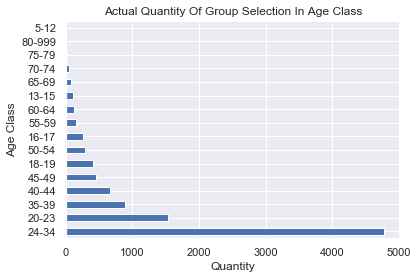

In [151]:
# Sourced from https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib

df['AgeClass'].value_counts().plot(kind='barh')
plt.title('Actual Quantity Of Group Selection In Age Class')
plt.ylabel('Age Class')
plt.xlabel('Quantity')

The above bar chart is a breakdown of the age groups by quantity out of a total of the sampleof 10,000. We can clearly see that the 24-34 age group dominates the field with almost 50% of the competitors. Trailing behind then is the 20-23 age group at about 15% and then the 35-44 age group at about 8% with the remaining field taking up 5% or close to 1% in the end cases. We will only count the age groups up to 64 as the others are so small as to be ignored. With this data we can once again use the numpy.random.choice fucntion as directed above to provide an array of the data we need.

['24-34' '35-39' '24-34' '24-34' '40-44' '35-39' '40-44' '50-54' '18-19'
 '35-39' '24-34' '24-34' '45-49' '24-34' '45-49' '24-34' '24-34' '24-34'
 '24-34' '50-54' '18-19' '35-39' '18-19' '24-34' '24-34' '20-23' '24-34'
 '24-34' '24-34' '20-23' '24-34' '18-19' '24-34' '24-34' '24-34' '24-34'
 '24-34' '24-34' '24-34' '24-34' '24-34' '24-34' '20-23' '35-39' '24-34'
 '40-44' '20-23' '24-34' '24-34' '20-23' '24-34' '16-17' '24-34' '24-34'
 '60-64' '16-17' '35-39' '13-15' '20-23' '40-44' '40-44' '18-19' '24-34'
 '24-34' '20-23' '24-34' '18-19' '35-39' '24-34' '24-34' '24-34' '16-17'
 '24-34' '35-39' '24-34' '45-49' '20-23' '24-34' '45-49' '40-44' '24-34'
 '24-34' '24-34' '24-34' '24-34' '24-34' '35-39' '40-44' '24-34' '20-23'
 '40-44' '40-44' '24-34' '24-34' '40-44' '16-17' '24-34' '24-34' '24-34'
 '24-34' '16-17']


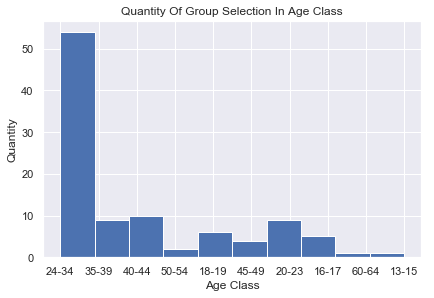

,Sex,Age Class
96,Female,24-34
97,Female,24-34
98,Female,24-34
99,Male,24-34
100,Male,16-17


In [152]:
# Use random.choice function with relation to the above functions to generate a sampling of ages in the dataset with the probabilities determined from the open powerlifting dataset used. 

Age = ['13-15', '16-17', '18-19', '20-23', '24-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
Age = np.random.choice(Age, 101, p=[0.01, 0.05, 0.05, 0.15, 0.5, 0.08, 0.08, 0.05, 0.01, 0.01, 0.01])
print(Age)

plt.hist(Age)
plt.tight_layout()
plt.title('Quantity Of Group Selection In Age Class')
plt.ylabel('Quantity')
plt.xlabel('Age Class')
plt.show()

# Insert new column onto newly created dataframe labeled Age Class with the results of the above random generation

NewDF.insert(1, 'Age Class', Age, True)

# Check dataframe

NewDF.tail()

From the above data we can see that we have gotten roughly the same proportions as the graph taken from the empirical data with a few variations. This makes it a suitable formula to use in the data set generation.

### Weight

Weight is another important variable in powerlifitng. It is generally thought that the heavier someone is the more weight they can push within reason. This obviously peaks out at certain stages and the amount lifted as a ratio of total bodyweight quickly falls away as the numbers go up. This category will need to be broken into male and female weights and so will rely on the previously generated data to make the appropriate weight generation. Here we'd expect men to be on the heavier than women but we'll need to test the data to determine the relationship to make effective data. 


In [153]:
# Determine the mean and standard deviation

df[['BodyweightKg','Sex']].groupby('Sex').describe().transpose()

Sex                           F            M
BodyweightKg count  3072.000000  6914.000000
             mean     72.233483    96.696743
             std      18.859089    19.953721
             min      40.800000    48.950000
             25%      59.300000    82.100000
             50%      67.200000    94.400000
             75%      80.800000   108.000000
             max     164.100000   194.000000

From the above we can see that the average bodyweight between the sexes has a large difference with 72 kg for females and 97 kg for males but with quite similar standard deviation at 19 for females and 20 for males. We'll now use these values to generate some data together with the previously generated sex column.

[ 48.7  94.4  70.2  75.3  69.8  49.   67.7  45.2  72.   98.5  84.7  84.2
  61.   68.6  97.5  81.6  70.8  57.8  65.9  62.1 100.3  89.6  72.9  95.5
 117.1  99.8  88.4  47.8  94.   93.4  79.8  67.2  61.4  65.8  62.1  64.
  78.   73.7  32.4  84.9  57.4  66.2  92.   77.9 102.   50.4  85.4  45.
 113.7  27.2  82.9  89.1  75.5  58.4  84.5  90.3  53.6  88.2  79.2  74.4
  71.8  86.3  90.2  69.   98.2  84.4  37.2  66.9  79.8  49.  106.9  26.3
  81.   59.6  79.2  74.5  88.9  61.1  42.7  78.3  64.5  75.3  86.6  92.2
  69.6  48.6  61.7  97.4  73.8  87.7  59.7  83.   71.5  57.3  79.4  55.2
  82.1  55.2  75.4  86.7  83.4]


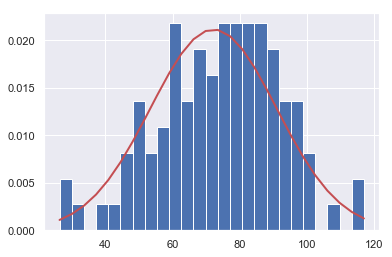

In [154]:
# Sourced from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
# determine formula for generating the correct weight for females

F_Mu = 72.23
F_Sigma = 18.86
F_Weight = np.random.normal(F_Mu, F_Sigma, 101).round(1)
print(F_Weight)

count, bins, ignored = plt.hist(F_Weight, 25, density=True)
plt.plot(bins, 1/(F_Sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - F_Mu)**2 / (2 * F_Sigma**2) ),
         linewidth=2, color='r')
plt.show()

[104.6 103.4  75.3  61.8 118.8 119.3  64.   99.4  95.1 108.5 114.2  62.9
  92.9 101.9  91.3  88.7  77.7 104.4 115.7 101.8  69.1 101.4  66.8 114.1
  82.6 118.6 115.1 108.3  99.   80.7  83.6  78.2  83.8  71.9 106.9 134.3
 114.1  51.7  84.4  67.6  93.2 110.5 131.1  88.9 102.4 111.5  84.3  95.6
  78.2 101.5 123.  103.3 117.1  70.5  83.7  63.8 106.2  64.8  72.6 108.7
 114.9  92.1 105.8 152.4  98.4 128.5 126.4  98.3 115.7 105.   64.3 116.2
  82.7  60.6 110.1 109.2  90.1  91.4 128.4 132.4  89.9  74.3  61.5 139.2
 120.8 105.8  96.3  67.4 124.8  93.   85.7 105.6  90.3 106.3 114.4  70.9
 111.2  91.4  57.7 102.6 121.3]


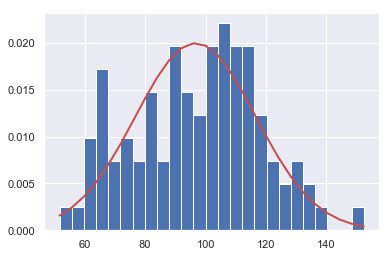

In [155]:
# determine formula for generating the correct weight for females

M_Mu = 96.7
M_Sigma = 19.95
M_Weight = np.random.normal(M_Mu, M_Sigma, 101).round(1)
print(M_Weight)

count, bins, ignored = plt.hist(M_Weight, 25, density=True)
plt.plot(bins, 1/(M_Sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - M_Mu)**2 / (2 * M_Sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [156]:
# Sourced from https://stackoverflow.com/questions/43391591/if-else-function-in-pandas-dataframe

NewDF['Weight (kg)'] = np.where(NewDF['Sex'] == 'Female', np.random.normal(F_Mu, F_Sigma, 101).round(1), np.random.normal(M_Mu, M_Sigma, 101).round(1))

# Check dataframe

NewDF.head(20)

,Sex,Age Class,Weight (kg)
0,Female,24-34,57.8
1,Female,35-39,66.2
2,Male,24-34,113.6
3,Male,24-34,95.4
4,Female,40-44,60.1
5,Female,35-39,66.4
6,Female,40-44,91.6
7,Male,50-54,71.2
8,Male,18-19,100.2
9,Female,35-39,57.4


### Squat, Bench & Deadlift

To generate some realistic values of weight lifted we'll need to calculate the mean value of weight lifted for males and females and the standard deviation of this to show the wide variety. We will again use the open powerlifitng dataset to get an ideo of the values we're looking at. It is widely considered standard that there is a relationship between the sex and the persons bodyweight to how much they will lift. 

In [157]:
NewData = {'Age':[Age],
           'Sex':[Sex]}

Newdf = pd.DataFrame(NewData)

Newdf.head().transpose()

,0
Age,"[24-34, 35-39, 24-34, 24-34, 40-44, 35-39, 40-..."
Sex,"[Female, Female, Male, Male, Female, Female, F..."


https://www.ncbi.nlm.nih.gov/pubmed/28682930
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html
https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python/54150900
https://pandas.pydata.org/
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html